# Proyecto GoGreen Bikesharing

### Cargamos las librerias 

In [384]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

---

### Cargamos los datos facilitados

In [385]:
df = pd.read_pickle("datos/bikes2.pk")
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801


Facilitamos unas funciones para la apertura de archivos y guardado :

In [386]:
def apertura_archivo (nombre_archivo):
    ruta = 'datos/' + nombre_archivo
    df_csv = pd.read_csv(ruta, index_col = 0)
    return df_csv

In [387]:
def guardar_archivo (nombre_archivo,nombre_guardado):
    return nombre_archivo.to_csv(nombre_guardado)

### Primera aproximación a los datos

In [388]:
print(f'Las columnas de este df son:') 
df.info()

Las columnas de este df son:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dt

In [389]:
print(f'Las columnas de este df son:') 
df.columns

Las columnas de este df son:


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Vemos que todos los nombres son iguales, sin espacios y en minusculas.Planteamos una función por si los **próximos** datos tuvieran que unificarse con esto.

In [390]:
def unificar_col (df): 
    lista_columnas = {col: col.strip().replace(" ", "_").lower() for col in df.columns}
    return df.rename(columns=lista_columnas, inplace=True)

In [391]:
print(f'Las columnas y filas de este df son: {df.shape}')

Las columnas y filas de este df son: (730, 16)


In [392]:
print(f'Los tipos de datos de este df son:') 
df.dtypes

Los tipos de datos de este df son:


instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Principales estadisticos de las columnas

In [393]:
# para las variables numéricas
print(f'Los principales estadisticos de las columnas NÚMERICAS de este df son:') 
df.describe().T # el .T nos transpone el resultado del describe

Los principales estadisticos de las columnas NÚMERICAS de este df son:


,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


In [394]:
# para las variables categóricas
#print(f'Los principales estadisticos de las columnas CATEGÓRICAS de este df son:') 
#df.describe(include="object")

# Duplicados

In [395]:
print(f'Los duplicados de este df son:{df.duplicated().sum()}') 

Los duplicados de este df son:0


In [396]:
print(f'Los duplicados de este df son:')
pd.DataFrame(df.isnull().sum())

Los duplicados de este df son:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [397]:
print(f'Los duplicados de este df son:')
pd.DataFrame(df.isna().sum())

Los duplicados de este df son:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# Nulos

In [398]:
print(f'Los nulos de este df son:')
df.stb.missing()

Los nulos de este df son:


,missing,total,percent
instant,0,730,0.0
dteday,0,730,0.0
season,0,730,0.0
yr,0,730,0.0
mnth,0,730,0.0
holiday,0,730,0.0
weekday,0,730,0.0
workingday,0,730,0.0
weathersit,0,730,0.0
temp,0,730,0.0


# Categóricas

In [399]:
# los valores unicos y sus frecuencias
def frecuencias(col):
    return pd.DataFrame(df[col].value_counts())

In [400]:
frecuencias('instant')

,instant
1,1
480,1
482,1
483,1
484,1
...,...
246,1
247,1
248,1
249,1


In [401]:
frecuencias('dteday')

,dteday
2018-01-01,1
2019-04-25,1
2019-04-27,1
2019-04-28,1
2019-04-29,1
...,...
2018-09-03,1
2018-09-04,1
2018-09-05,1
2018-09-06,1


In [402]:
frecuencias('season')

,season
verano,188
primavera,184
invierno,180
otoño,178


In [403]:
frecuencias('yr')

,yr
0,365
1,365


In [404]:
frecuencias('mnth')

,mnth
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60
9,60


In [405]:
frecuencias('holiday')

,holiday
no festivo,709
festivo,21


In [406]:
frecuencias('weekday')

,weekday
1,105
2,105
3,104
4,104
5,104
6,104
7,104


In [407]:
frecuencias('workingday')

,workingday
laborable,522
finde,208


In [408]:
frecuencias('weathersit')

,weathersit
1,463
2,246
3,21


In [409]:
frecuencias('temp')

,temp
26.035000,5
10.899153,5
27.880000,4
28.563347,4
23.130847,4
...,...
27.435847,1
26.376653,1
28.989419,1
28.700000,1


In [410]:
frecuencias('atemp')

,atemp
32.73440,4
18.78105,3
31.85040,3
28.59875,2
23.32625,2
...,...
28.94730,1
30.46145,1
30.10650,1
31.34500,1


In [411]:
frecuencias('hum')

,hum
61.3333,4
63.0833,3
55.2083,3
60.5000,3
56.8333,3
...,...
54.8333,1
56.1765,1
85.0000,1
76.1250,1


In [412]:
frecuencias('windspeed')

,windspeed
9.041918,3
11.166689,3
11.250104,3
15.333486,3
7.959064,3
...,...
12.416775,1
13.833289,1
14.250632,1
23.044181,1


In [413]:
frecuencias('casual')

,casual
120,4
968,4
639,3
163,3
775,3
...,...
2521,1
1935,1
783,1
688,1


In [414]:
frecuencias('registered')

,registered
4841,3
6248,3
1707,3
3461,2
2713,2
...,...
4138,1
3231,1
4018,1
3077,1


In [415]:
frecuencias('cnt')

,cnt
5409,2
2424,2
5698,2
4459,2
5119,2
...,...
5345,1
5046,1
4713,1
4763,1


In [416]:
# para sacar solo los valores únicos 
def valores_unicos(col):
    return pd.DataFrame(df[col].unique())

In [417]:
valores_unicos('dteday')

,0
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
725,2019-12-27
726,2019-12-28
727,2019-12-29
728,2019-12-30


In [418]:
valores_unicos('season')

,0
0,invierno
1,primavera
2,verano
3,otoño


In [419]:
valores_unicos('yr')

,0
0,0
1,1


In [420]:
valores_unicos('mnth')

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [421]:
valores_unicos('holiday')

,0
0,festivo
1,no festivo


In [422]:
valores_unicos('weekday')

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [423]:
valores_unicos('workingday')

,0
0,laborable
1,finde


In [424]:
valores_unicos('weathersit')

,0
0,2
1,1
2,3


In [425]:
valores_unicos('temp')

,0
0,14.110847
1,14.902598
2,8.050924
3,8.200000
4,9.305237
...,...
493,13.530000
494,9.483464
495,11.943464
496,10.386653


In [426]:
valores_unicos('atemp')

,0
0,18.18125
1,17.68695
2,9.47025
3,10.60610
4,11.46350
...,...
684,11.01665
685,11.33210
686,12.75230
687,11.58500


In [427]:
valores_unicos('hum')

,0
0,80.5833
1,69.6087
2,43.7273
3,59.0435
4,43.6957
...,...
589,51.5417
590,79.1304
591,73.4783
592,65.2917


In [428]:
valores_unicos('windspeed')

,0
0,10.749882
1,16.652113
2,16.636703
3,10.739832
4,12.522300
...,...
644,21.208582
645,23.458911
646,8.333661
647,23.500518


In [429]:
valores_unicos('casual')

,0
0,331
1,131
2,120
3,108
4,82
...,...
600,314
601,205
602,408
603,159


In [430]:
valores_unicos('registered')

,0
0,654
1,670
2,1229
3,1454
4,1518
...,...
673,1867
674,2451
675,1182
676,1432


In [431]:
valores_unicos('cnt')

,0
0,985
1,801
2,1349
3,1562
4,1600
...,...
690,2114
691,3095
692,1341
693,1796


# Hacemos unos df con las variables numericas y categoricas

In [432]:
# Creamos un dataframe nuevo con las variables categóricas
df_categoricas = df.select_dtypes(include = "object")
df_categoricas.head(2)

""
0
1


In [433]:
# Creamos un dataframe nuevo con las variables numéricas
df_numericas = df.select_dtypes(np.number)
df_numericas.head(2)

,instant,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801


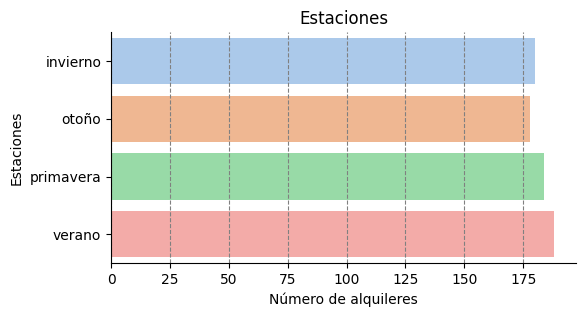

In [434]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = df["season"], data = df, palette='pastel')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Estaciones')
plt.xlabel('Número de alquileres')
plt.ylabel('Estaciones')
plt.show();

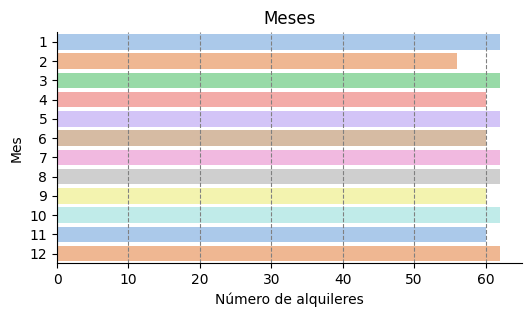

In [435]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = df["mnth"], data = df, palette='pastel')

plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Meses')
plt.xlabel('Número de alquileres')
plt.ylabel('Mes')
plt.show();

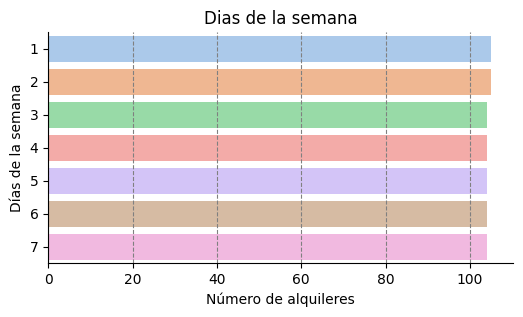

In [436]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = df["weekday"], data = df, palette='pastel')

plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Dias de la semana')
plt.xlabel('Número de alquileres')
plt.ylabel('Días de la semana')
plt.show();

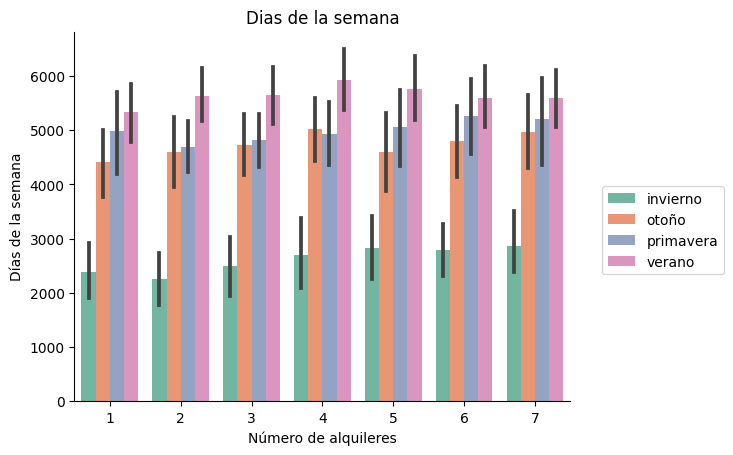

In [437]:
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.barplot(x='weekday', y='cnt', hue='season', data=df, palette='Set2');
plt.title('Dias de la semana')
plt.xlabel('Número de alquileres')
plt.ylabel('Días de la semana')
# colocar la leyenda fuera de la esquina inferior derecha de la 
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show();

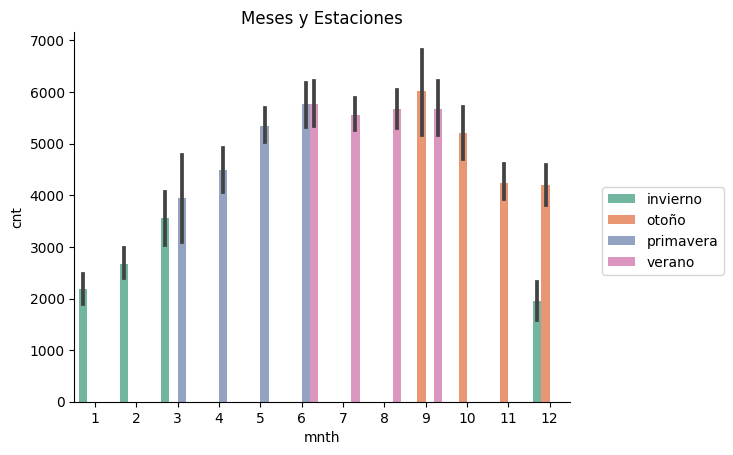

In [438]:
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#------------------------------------------
plt.title('Meses y Estaciones')
plt.xlabel('Meses')
plt.ylabel('Alquileres')
#-----------------------------------------
sns.barplot(x='mnth', y='cnt', hue='season', data=df, palette='Set2')
#-----------------------------------------------
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show();

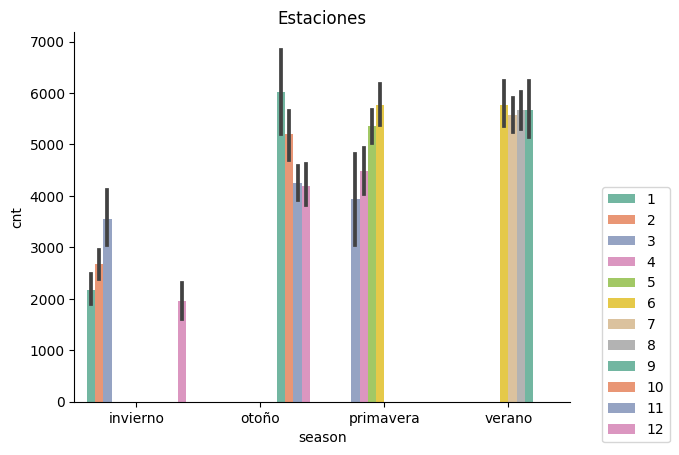

In [439]:
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#------------------------------------------
plt.title('Estaciones')
plt.xlabel('Estaciones')
plt.ylabel('Alquileres')

sns.barplot(x='season', y='cnt', hue='mnth', data=df, palette='Set2')
#-----------------------------------------------
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show();

# Outliers

Los identificamos visualmente

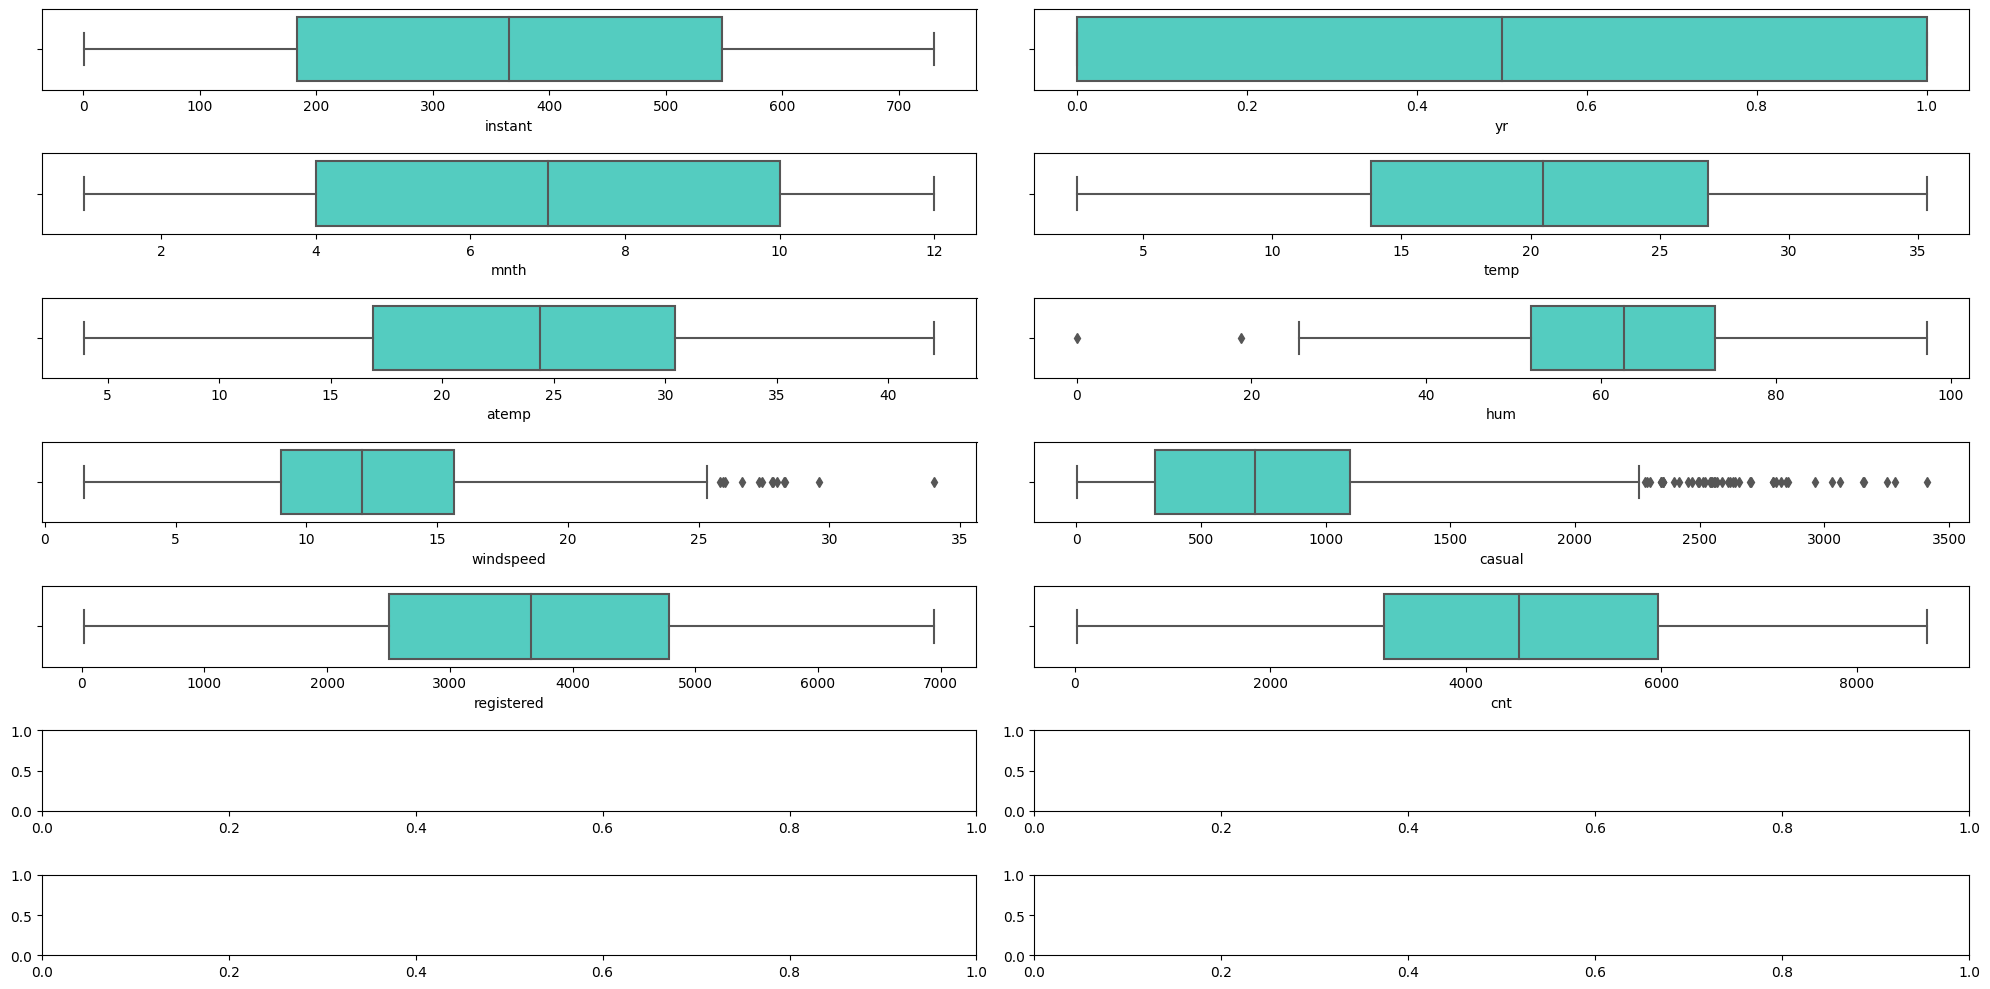

In [440]:
fig, axes = plt.subplots(7,2, figsize=(20,10))
axes = axes.flat
for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad
plt.tight_layout()
plt.show();

In [441]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,invierno,0,1,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,invierno,0,1,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,invierno,0,1,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Detectamos los outliers analiticamente

In [442]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas: 
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    return dicc_indices

In [443]:
df.shape

(730, 16)

In [444]:
columnas_numericas = list(df_numericas.columns)
columnas_numericas

['instant',
 'yr',
 'mnth',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [445]:
ind= indices_outliers = detectar_outliers(columnas_numericas, df)

In [446]:
# en que columnas nos hemos encontrado con outliers? 
ind.keys()

dict_keys(['hum', 'windspeed', 'casual'])

Creamos un df solo con estas columnas

In [447]:
df_outlier=df.copy()

In [448]:
df_outlier.drop(['instant', 'dteday', 
                    'season', 'yr', 'mnth', 
                    'weekday','workingday', 'weathersit', 
                    'temp', 'atemp', 'registered', 'cnt','holiday','hum','windspeed'],axis=1,inplace=True)


In [449]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [450]:
df_outlier.head(2)

,casual
0,331
1,131


In [451]:
Q1_casual = np.nanpercentile(df['casual'], 25)
Q3_casual = np.nanpercentile(df['casual'], 75)
IQR_casual = Q3_casual - Q1_casual
outlier_step_casual = 1.5 * IQR_casual
        

In [452]:
outliers_data = df[(df['casual'] < Q1_casual- outlier_step_casual) | (df['casual'] > Q3_casual + outlier_step_casual)]

In [453]:
outliers_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
148,149,2018-05-29,primavera,0,5,no festivo,2,laborable,1,27.367500,30.77750,81.8750,14.333846,2355,2433,4788
183,184,2018-07-03,verano,0,7,no festivo,2,laborable,2,29.383347,33.42875,68.2500,15.333486,2282,2367,4649
184,185,2018-07-04,verano,0,7,festivo,3,laborable,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
196,197,2018-07-16,verano,0,7,no festivo,1,laborable,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
246,247,2018-09-04,verano,0,9,no festivo,2,laborable,1,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
281,282,2018-10-09,otoño,0,10,no festivo,2,laborable,1,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
440,441,2019-03-17,invierno,1,3,no festivo,7,finde,2,21.080847,25.25230,75.5833,7.417168,3155,4681,7836
446,447,2019-03-23,primavera,1,3,no festivo,6,finde,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
454,455,2019-03-31,primavera,1,3,no festivo,7,finde,2,17.390847,21.08540,73.8333,16.791339,2301,3934,6235
455,456,2019-04-01,primavera,1,4,no festivo,1,laborable,2,17.459153,20.86435,67.6250,11.541889,2347,3694,6041


In [454]:
outliers_data.shape

(44, 16)

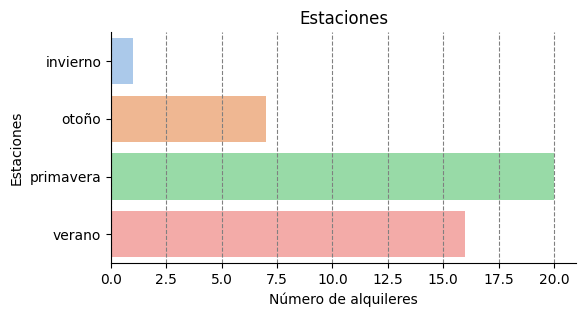

In [455]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = outliers_data["season"], data = outliers_data, palette='pastel')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Estaciones')
plt.xlabel('Número de alquileres')
plt.ylabel('Estaciones')
plt.show();

In [456]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,invierno,0,1,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,invierno,0,1,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,invierno,0,1,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


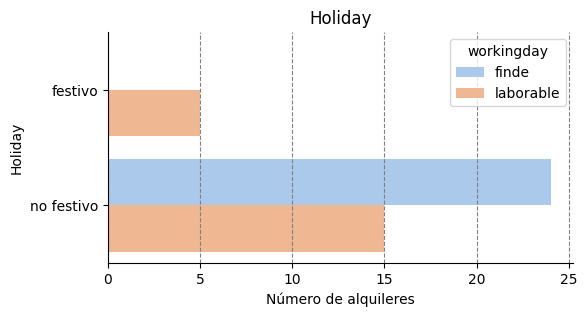

In [457]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = outliers_data["holiday"], data = outliers_data, palette='pastel', hue= 'workingday')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Holiday')
plt.xlabel('Número de alquileres')
plt.ylabel('Holiday')
plt.show();

In [458]:
df.groupby("weekday")['casual'].sum()

weekday
1    141191
2    100781
3     65429
4     60750
5     59665
6     70954
7    121182
Name: casual, dtype: int64

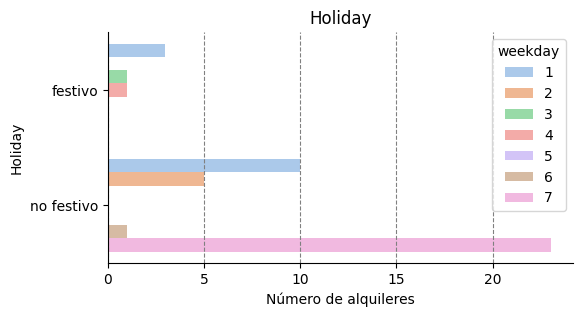

In [459]:
plt.figure(figsize = (6,3))
# hacen invisibles los bordes del recuadro
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.countplot(y = outliers_data["holiday"], data = outliers_data, palette='pastel', hue= 'weekday')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')

plt.title('Holiday')
plt.xlabel('Número de alquileres')
plt.ylabel('Holiday')
plt.show();

Decidimos que hacer con los outliers.

Vamos a ver un poco mejor nuestras variables numericas y sus distribuciones para ver como tratamos los outliers

In [460]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (100, 80))
axes = axes.flat#iterador

for i, colum in enumerate(df_numericas.columns): 
    sns.histplot(
        data = df_numericas[colum],
        kde = True,
        color = "green", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

# Nos planteamos si las columnas tienen el tipo adecuado pra los datos que contienen

In [461]:
print(f'Vemos este df :') 
df.sample(5)

Vemos este df :


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
281,282,2018-10-09,otoño,0,10,no festivo,2,laborable,1,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
657,658,2019-10-20,otoño,1,10,no festivo,7,finde,1,19.850847,23.64210,57.2917,7.874979,2806,5284,8090
413,414,2019-02-18,invierno,1,2,festivo,1,laborable,1,14.213347,17.77125,53.4583,12.792243,1435,2883,4318
191,192,2018-07-11,verano,0,7,no festivo,3,laborable,1,31.262500,36.49020,63.5833,18.916579,723,3363,4086
515,516,2019-05-31,primavera,1,5,no festivo,5,laborable,1,27.880000,31.56645,49.2917,13.083693,1100,6238,7338


In [462]:
print(f'Las columnas de este df son:') 
df.info()

Las columnas de este df son:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dt

- Vemos que la columna dteday en objet pero contiene fechas.

`A la vista de los outliers de la columna 'casual' hemos decidido separar los mismo a otro dataframe para su posterior analisis, ya que no arrojaban datos relevantes para el analisis general. Trataremos de averiguar que patron siguen para su analisis.`

In [463]:
outliers_data.to_pickle('datos/df_outliers.pk')

Vamos a eliminar de nuestro Dataset las filas que corresponden a los outliers de 'casual' parea poder continuar analizandolo.

In [464]:
indices_casual=ind['casual']

In [465]:
df.drop(indices_casual, axis=0, inplace=True)



In [466]:
df.reset_index()

,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2,3,2018-01-03,invierno,0,1,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,3,4,2018-01-04,invierno,0,1,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,4,5,2018-01-05,invierno,0,1,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,725,726,2019-12-27,invierno,1,12,no festivo,5,laborable,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
682,726,727,2019-12-28,invierno,1,12,no festivo,6,finde,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
683,727,728,2019-12-29,invierno,1,12,no festivo,7,finde,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
684,728,729,2019-12-30,invierno,1,12,no festivo,1,laborable,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [467]:
df.shape 

(686, 16)

In [468]:
numericas2= df.select_dtypes(np.number)

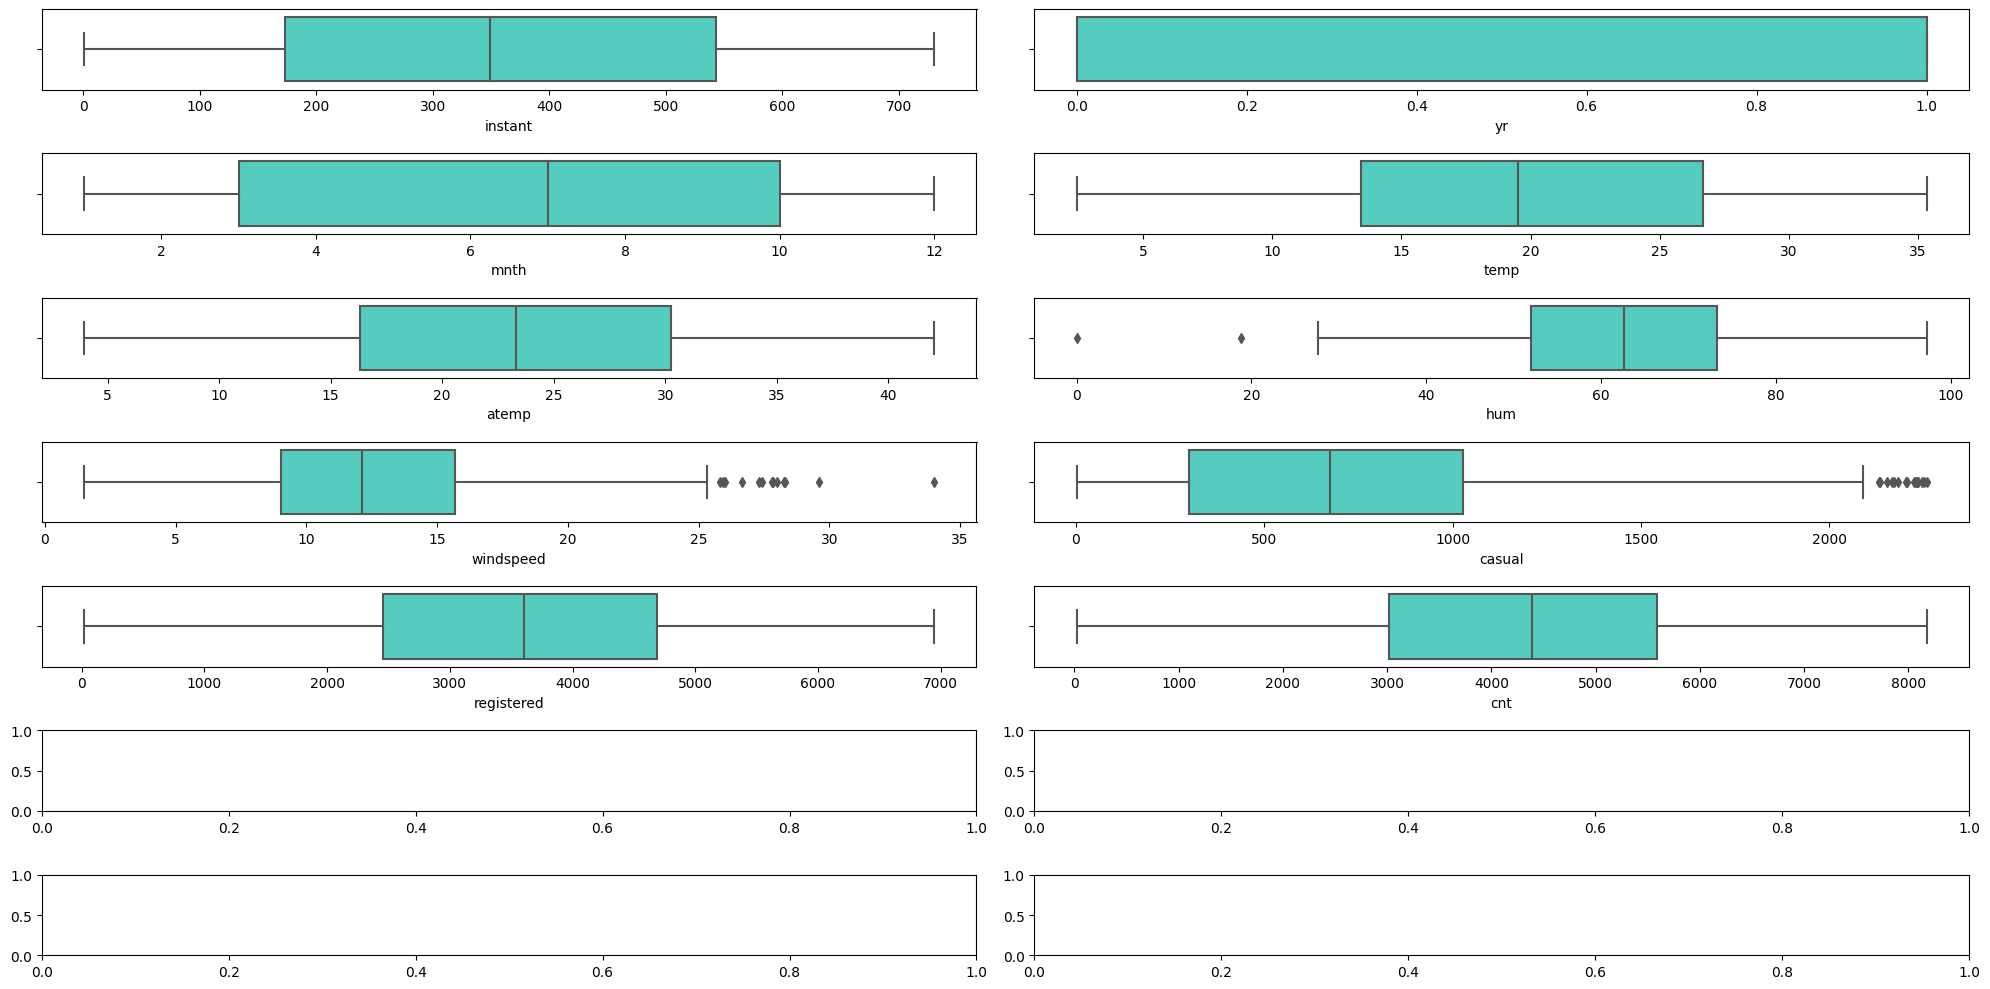

In [469]:
fig, axes = plt.subplots(7,2, figsize=(20,10))
axes = axes.flat
for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad
plt.tight_layout()
plt.show();

Ya hemos eliminado las filas de los outliers, asique procedemos a guardar el Dataframe.

---

In [470]:
indices_windspeed= ind['windspeed']
indices_windspeed

[44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]

In [471]:
Q1_wind = np.nanpercentile(df['windspeed'], 25)
Q3_wind = np.nanpercentile(df['windspeed'], 75)
IQR_wind = Q3_wind - Q1_wind
outlier_step_wind = 1.5 * IQR_wind

In [472]:
outliers_data_wind = df[(df['windspeed'] < Q1_wind- outlier_step_wind) | (df['windspeed'] > Q3_wind + outlier_step_wind)]
outliers_data_wind


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2018-02-14,invierno,0,2,no festivo,3,laborable,1,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,50,2018-02-19,invierno,0,2,festivo,1,laborable,1,16.365847,19.57020,18.7917,34.000021,532,1103,1635
93,94,2018-04-04,primavera,0,4,no festivo,3,laborable,1,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,95,2018-04-05,primavera,0,4,no festivo,4,laborable,2,16.980847,19.91750,64.2083,26.000489,167,1628,1795
292,293,2018-10-20,otoño,0,10,no festivo,6,finde,1,19.509153,23.32625,63.6250,28.292425,471,3724,4195
382,383,2019-01-18,invierno,1,1,no festivo,5,laborable,1,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,408,2019-02-12,invierno,1,2,no festivo,2,laborable,1,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,421,2019-02-25,invierno,1,2,no festivo,1,laborable,1,11.924153,12.78375,39.5833,28.250014,317,2415,2732
431,432,2019-03-08,invierno,1,3,no festivo,5,laborable,1,21.627500,26.23020,56.7500,29.584721,486,4896,5382
432,433,2019-03-09,invierno,1,3,no festivo,6,finde,2,16.844153,19.85415,40.7083,27.791600,447,4122,4569


In [473]:
ind.items()

dict_items([('hum', [49, 68]), ('windspeed', [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]), ('casual', [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679])])

In [474]:
for k, v in ind.items():
    median = df[k].median()
    for i in v:
        df.loc[i,k] = median

In [379]:
#df.drop(indices_windspeed, axis=0, inplace=True) #Decidimos dejar los outliers de esta columna por eso lo hemos comentado

In [380]:
outliers_data_wind

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2018-02-14,invierno,0,2,no festivo,3,laborable,1,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,50,2018-02-19,invierno,0,2,festivo,1,laborable,1,16.365847,19.57020,18.7917,34.000021,532,1103,1635
93,94,2018-04-04,primavera,0,4,no festivo,3,laborable,1,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,95,2018-04-05,primavera,0,4,no festivo,4,laborable,2,16.980847,19.91750,64.2083,26.000489,167,1628,1795
292,293,2018-10-20,otoño,0,10,no festivo,6,finde,1,19.509153,23.32625,63.6250,28.292425,471,3724,4195
382,383,2019-01-18,invierno,1,1,no festivo,5,laborable,1,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,408,2019-02-12,invierno,1,2,no festivo,2,laborable,1,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,421,2019-02-25,invierno,1,2,no festivo,1,laborable,1,11.924153,12.78375,39.5833,28.250014,317,2415,2732
431,432,2019-03-08,invierno,1,3,no festivo,5,laborable,1,21.627500,26.23020,56.7500,29.584721,486,4896,5382
432,433,2019-03-09,invierno,1,3,no festivo,6,finde,2,16.844153,19.85415,40.7083,27.791600,447,4122,4569


In [381]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,673.0,357.069837,211.968452,1.000000,174.000000,348.000000,544.000000,730.000000
yr,673.0,0.473997,0.499695,0.000000,0.000000,0.000000,1.000000,1.000000
mnth,673.0,6.558692,3.503385,1.000000,3.000000,7.000000,10.000000,12.000000
temp,673.0,20.068948,7.587514,2.424346,13.495847,19.850847,26.786653,35.328347
atemp,673.0,23.458034,8.228763,3.953480,16.318950,23.547500,30.397900,42.044800
hum,673.0,63.165048,14.241292,0.000000,52.458300,63.083300,73.416700,97.250000
windspeed,673.0,12.514567,4.857038,1.500244,9.000043,11.958093,15.478139,25.333236
casual,673.0,738.906389,523.056156,2.000000,304.000000,678.000000,1031.000000,2258.000000
registered,673.0,3627.016345,1581.436912,20.000000,2482.000000,3614.000000,4709.000000,6946.000000
cnt,673.0,4365.922734,1866.281785,22.000000,3068.000000,4401.000000,5633.000000,8173.000000


In [382]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [383]:
df.to_pickle('datos/bikes_sin_outliers.pk')